<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

<ipython-input-1-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [7]:
print(df['ConvertedComp'].describe())

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64


Plot the histogram for the column `ConvertedComp`.


What is the median of the column `ConvertedComp`?


In [13]:
print(df['ConvertedComp'].median())

57745.0


How many responders identified themselves only as a **Man**?


In [14]:
print(df[df['Gender'] == 'Man'].shape[0])

10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [15]:
print(df[df['Gender'] == 'Woman'].shape[0])

731


In [22]:
# Filter responders who identified as 'Woman'
woman_responders = df[df['Gender'] == 'Woman']

# Calculate the median of ConvertedComp for 'Woman' responders
median_woman_converted_comp = woman_responders['ConvertedComp'].median()
print(f"The median Converted Compensation for Women is: {median_woman_converted_comp}")


The median Converted Compensation for Women is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [16]:
print(df['Age'].describe())

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


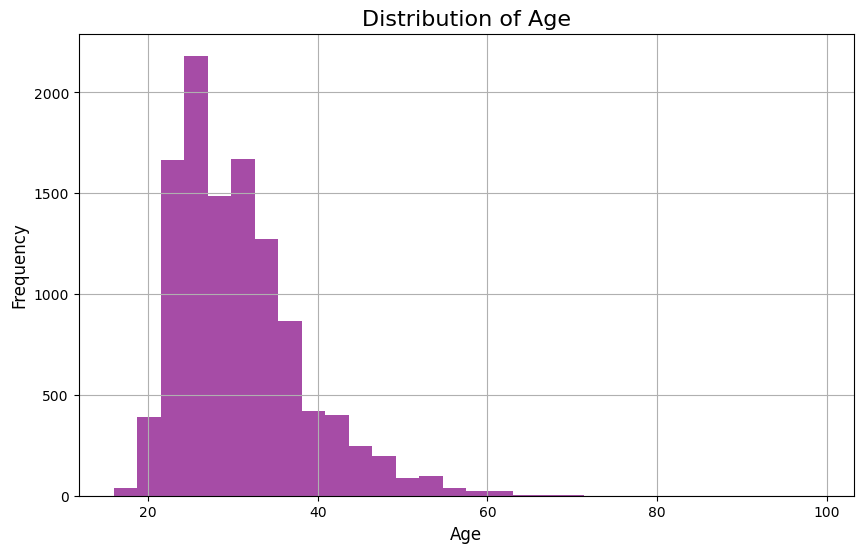

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='purple', alpha=0.7)
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


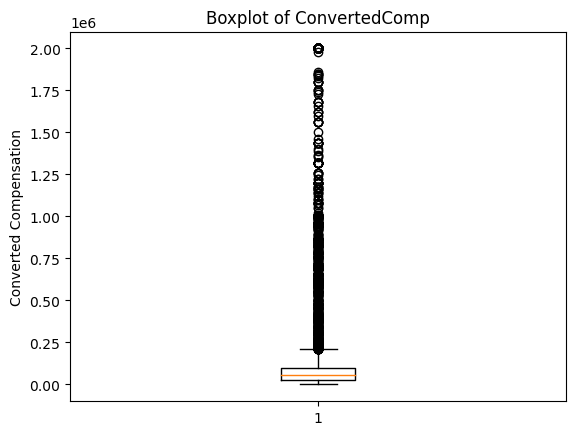

In [29]:
plt.boxplot(df['ConvertedComp'].dropna())
plt.title('Boxplot of ConvertedComp')
plt.ylabel('Converted Compensation')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [31]:
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
iqr = q3 - q1

Find out the upper and lower bounds.


In [32]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

Identify how many outliers are there in the `ConvertedComp` column.


In [33]:
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = outliers.shape[0]
print(f"Number of outliers: {num_outliers}")

Number of outliers: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [36]:

df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Check the new DataFrame shape
print(f"Shape of new DataFrame after removing outliers: {df_no_outliers.shape}")

Shape of new DataFrame after removing outliers: (9703, 85)


In [38]:
print(df_no_outliers['ConvertedComp'].median())

print(df_no_outliers['ConvertedComp'].mean())

52704.0
59883.20838915799


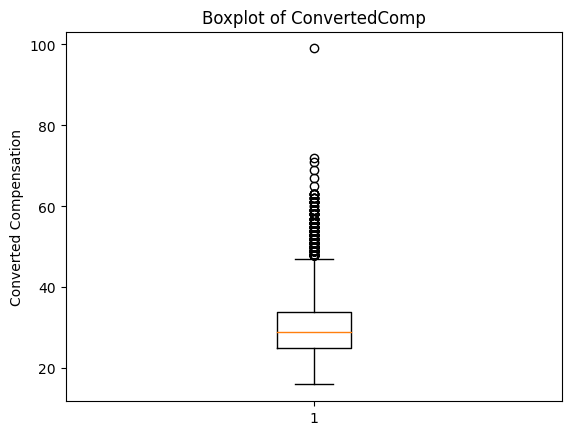

In [40]:
plt.boxplot(df['Age'].dropna())
plt.title('Boxplot of ConvertedComp')
plt.ylabel('Converted Compensation')
plt.show()

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [47]:
# Select only the numerical columns from the dataframe
numeric_df = df.select_dtypes(include=['number'])

# Find the correlation of 'Age' with all other numerical columns
correlation_matrix = numeric_df.corr()

# Check if 'Age' is in the dataframe before extracting correlations
if 'Age' in correlation_matrix.columns:
    # Extract the correlations of the 'Age' column
    age_correlations = correlation_matrix['Age'].sort_values(ascending=False)

    # Print the correlations of Age with other numerical columns
    print(age_correlations)
else:
    print("'Age' column not found in the numeric columns of the dataset")

Age              1.000000
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CompTotal        0.006337
Respondent       0.002180
CodeRevHrs      -0.012878
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
